In [1]:
pip install -U mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 1.9 MB/s eta 0:00:00


In [2]:
from mplsoccer import Pitch, FontManager, Sbopen
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# sort csv by key passes
df = pd.read_csv('player_premier_league_passing.csv')
df_keypass = df.sort_values(by = 'KeyPas' , ascending = False).head(10)
df_keypass

,Unnamed: 0,Player,Nation,Pos,Squad,Age,90s_played,TotalComp_Passes,TotalAtt_Pass,TotalPas_Rate,...,LongPasses_Att,Assist,xAG,xA,Ast-xAG,KeyPas,PassinF3rd,PassinPen,CrossPasinPen,ProgPass
172,172,Bruno Fernandes,pt POR,"MF,FW",Manchester Utd,27,36.8,1498,2030,73.8,...,331,8,16.7,10.7,-8.7,119,148,89,10,263
520,520,Kieran Trippier,eng ENG,DF,Newcastle Utd,31,37.1,1995,2788,71.6,...,674,7,12.4,11.8,-5.4,110,182,97,26,260
127,127,Kevin De Bruyne,be BEL,MF,Manchester City,31,26.9,1192,1626,73.3,...,275,16,13.7,14.1,2.3,96,124,96,21,246
210,210,Pascal Groß,de GER,"MF,DF",Brighton,31,36.0,1879,2347,80.1,...,316,8,10.9,8.8,-2.9,80,157,69,13,255
568,568,Martin Ødegaard,no NOR,MF,Arsenal,23,34.7,1449,1804,80.3,...,175,7,8.1,7.9,-1.1,76,135,91,4,266
451,451,Bukayo Saka,eng ENG,FW,Arsenal,20,35.3,1054,1430,73.7,...,164,11,8.5,5.8,2.5,75,50,66,12,109
540,540,James Ward-Prowse,eng ENG,MF,Southampton,27,37.5,1716,2176,78.9,...,342,4,6.2,5.3,-2.2,74,177,31,16,189
384,384,Michael Olise,fr FRA,"FW,MF",Crystal Palace,20,30.5,985,1420,69.4,...,273,11,8.7,6.4,2.3,72,72,53,16,133
14,14,Trent Alexander-Arnold,eng ENG,DF,Liverpool,23,32.5,2188,2912,75.1,...,642,9,11.5,9.1,-2.5,71,239,82,28,235
313,313,James Maddison,eng ENG,"MF,FW",Leicester City,25,27.6,844,1150,73.4,...,186,9,9.3,5.7,-0.3,69,117,27,4,151


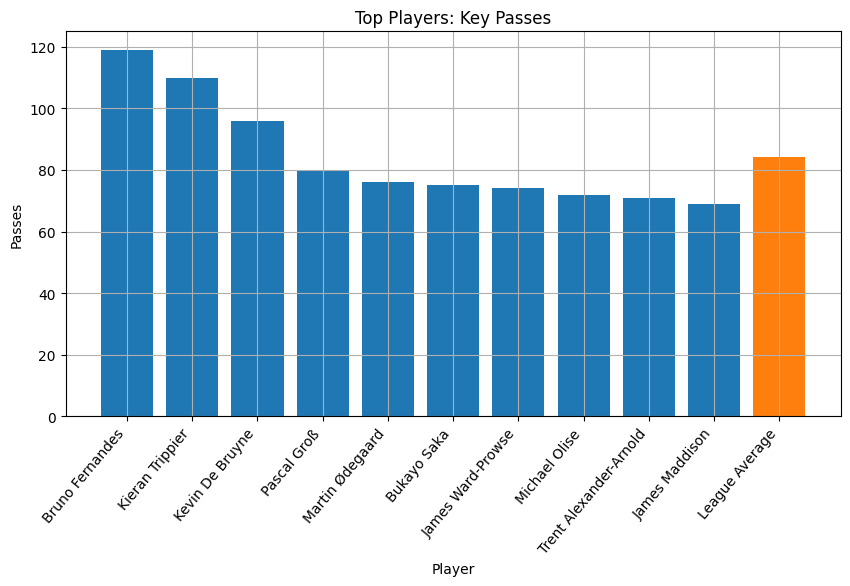

In [120]:
# top players by key passes with league average
df_keypass['Average_Key_Pass'] = df_keypass['KeyPas'].mean()
plt.figure(figsize=(10, 5))
plt.bar(df_keypass['Player'] , df_keypass['KeyPas'])
plt.bar('League Average', df_keypass['Average_Key_Pass'])
plt.title('Top Players: Key Passes')
plt.xlabel('Player')
plt.ylabel('Passes')
plt.xticks(rotation = 50 , ha = 'right')
plt.grid(True)
plt.show()

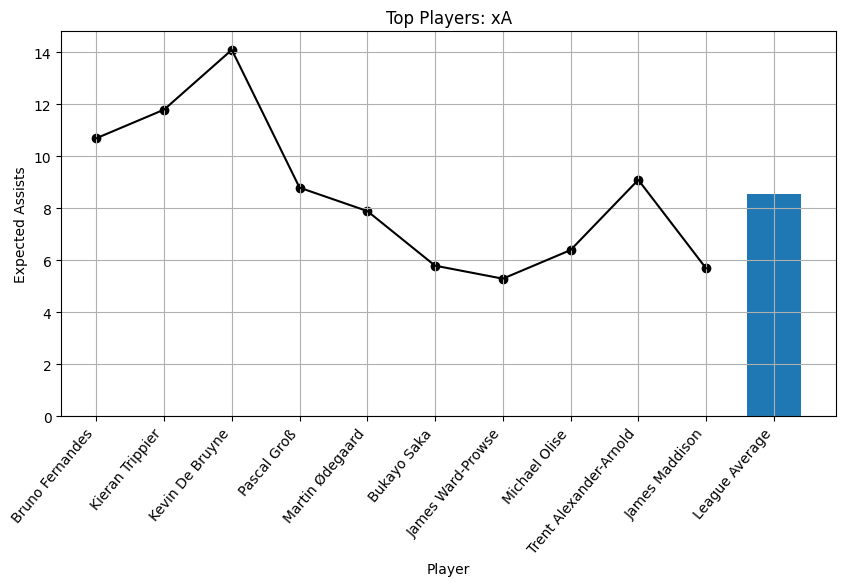

In [125]:
# top players by expected assists with league average
df_keypass['Average_xA'] = df_keypass['xA'].mean()
plt.figure(figsize = (10 , 5))
plt.scatter(df_keypass['Player'] , df_keypass['xA'] , color = 'black')
plt.bar('League Average' , df_keypass['Average_xA'])
plt.plot(df_keypass['Player'] , df_keypass['xA'] , color = 'black')
plt.title('Top Players: xA')
plt.xlabel('Player')
plt.ylabel('Expected Assists')
plt.xticks(rotation = 50 , ha = 'right')
plt.grid(True)
plt.show()

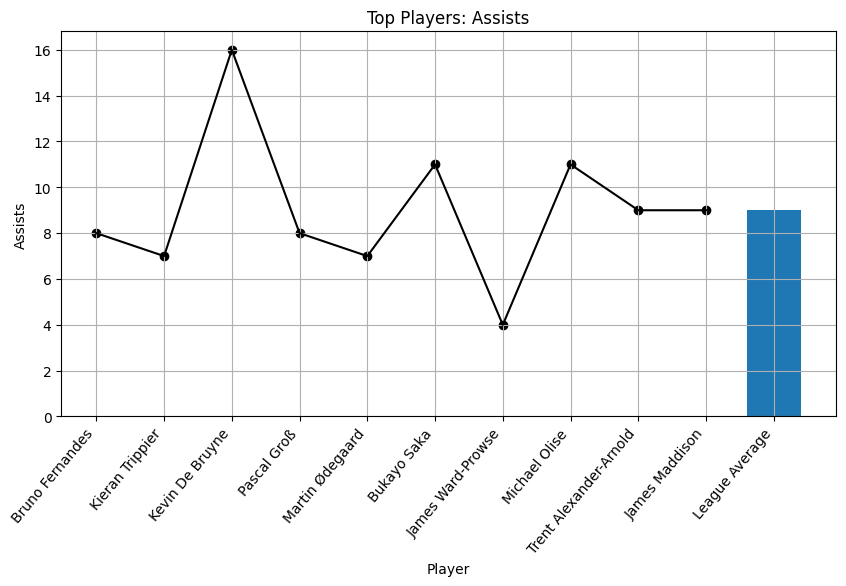

In [126]:
# top players by assists
df_keypass['Average_Assist'] = df_keypass['Assist'].mean()
plt.figure(figsize = (10 , 5))
plt.scatter(df_keypass['Player'] , df_keypass['Assist'] , color = 'black')
plt.plot(df_keypass['Player'] , df_keypass['Assist'] , color = 'black')
plt.bar('League Average' , df_keypass['Average_Assist'])
plt.title('Top Players: Assists')
plt.xlabel('Player')
plt.ylabel('Assists')
plt.xticks(rotation = 50 , ha = 'right')
plt.grid(True)
plt.show()

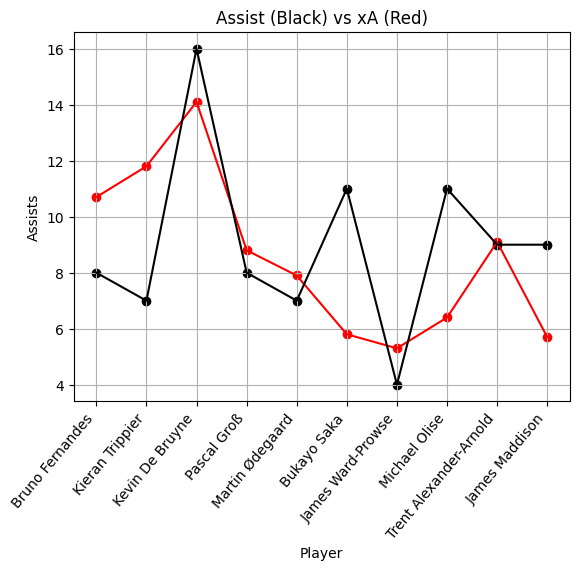

In [13]:
# top players' expected assists vs assists
plt.scatter(df_keypass['Player'] , df_keypass['xA'] , color = 'red')
plt.scatter(df_keypass['Player'] , df_keypass['Assist'] , color = 'black')
plt.plot(df_keypass['Player'] , df_keypass['xA'] , color = 'red')
plt.plot(df_keypass['Player'] , df_keypass['Assist'] , color = 'black')
plt.title('Assist (Black) vs xA (Red)')
plt.xlabel('Player')
plt.ylabel('Assists')
plt.xticks(rotation = 50 , ha = 'right')
plt.grid(True)
plt.show()

In [65]:
df = pd.read_csv('player_premier_league_possession.csv')
top_players = ['Bruno Fernandes' , 'Kieran Trippier' , 'Kevin De Bruyne' ,
               'Pascal Groß' , 'Martin Ødegaard' , 'Bukayo Saka' ,
               'James Ward-Prowse' , 'Michael Olise' , 'Trent Alexander-Arnold' , 'James Maddison']
df_poss = df[df['Player'].isin(top_players)]
df_poss

,Unnamed: 0,Player,Nation,Pos,Squad,Age,90s_played,TotalAtt_Pass,TotalComp_Passes,Pass_Blocked,Live_Passes,Dead_Passes,Switches_Pass,Cross_Passes
14,14,Trent Alexander-Arnold,eng ENG,DF,Liverpool,23,32.5,2912,2188,37,2393,509,59,252
127,127,Kevin De Bruyne,be BEL,MF,Manchester City,31,26.9,1626,1192,41,1454,160,27,226
172,172,Bruno Fernandes,pt POR,"MF,FW",Manchester Utd,27,36.8,2030,1498,65,1838,182,36,141
210,210,Pascal Groß,de GER,"MF,DF",Brighton,31,36.0,2347,1879,50,2004,333,20,224
313,313,James Maddison,eng ENG,"MF,FW",Leicester City,25,27.6,1150,844,29,998,142,8,123
384,384,Michael Olise,fr FRA,"FW,MF",Crystal Palace,20,30.5,1420,985,49,1189,229,21,242
451,451,Bukayo Saka,eng ENG,FW,Arsenal,20,35.3,1430,1054,62,1297,131,3,172
520,520,Kieran Trippier,eng ENG,DF,Newcastle Utd,31,37.1,2788,1995,50,2061,714,16,393
540,540,James Ward-Prowse,eng ENG,MF,Southampton,27,37.5,2176,1716,36,1840,329,14,241
568,568,Martin Ødegaard,no NOR,MF,Arsenal,23,34.7,1804,1449,45,1683,110,9,91


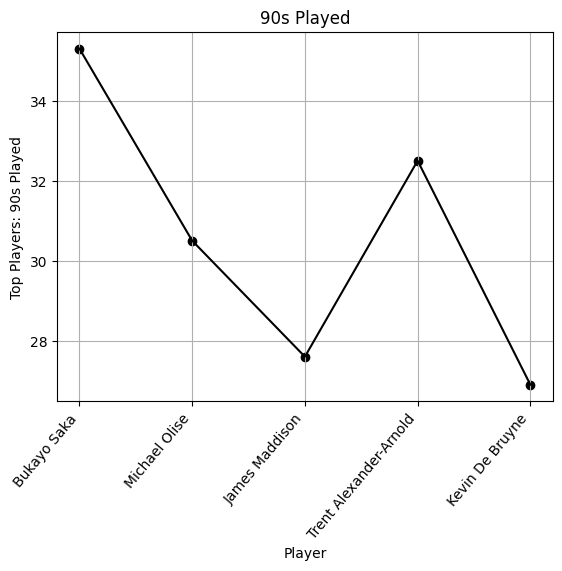

In [130]:
# top players' 90s played
plt.scatter(df_poss['Player'] , df_poss['90s_played'] , color = 'black')
plt.plot(df_poss['Player'] , df_poss['90s_played'] , color = 'black')
plt.title('90s Played')
plt.xlabel('Player')
plt.ylabel('Top Players: 90s Played')
plt.xticks(rotation = 50 , ha = 'right')
plt.grid(True)
plt.show()

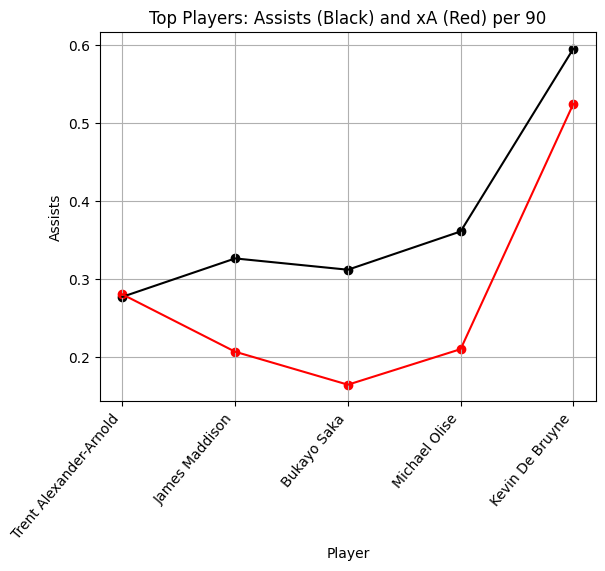

In [67]:
# assists per 90 and xA per 90
players = ['Kevin De Bruyne' , 'Bukayo Saka' , 'Michael Olise' , 'Trent Alexander-Arnold' , 'James Maddison']
p = df_keypass[df_keypass['Player'].isin(players)]
p = p.sort_values(by = 'Assist' , ascending = True)
p['Assists_per_90'] = p['Assist'] / p['90s_played']
p['xA_per_90'] = p['xA'] / p['90s_played']

plt.scatter(p['Player'] , p['Assists_per_90'] , color = 'black')
plt.scatter(p['Player'] , p['xA_per_90'] , color = 'red')
plt.plot(p['Player'] , p['Assists_per_90'] , color = 'black')
plt.plot(p['Player'] , p['xA_per_90'] , color = 'red')
plt.title('Top Players: Assists (Black) and xA (Red) per 90')
plt.xlabel('Player')
plt.ylabel('Assists')
plt.xticks(rotation = 50 , ha = 'right')
plt.grid(True)
plt.show()

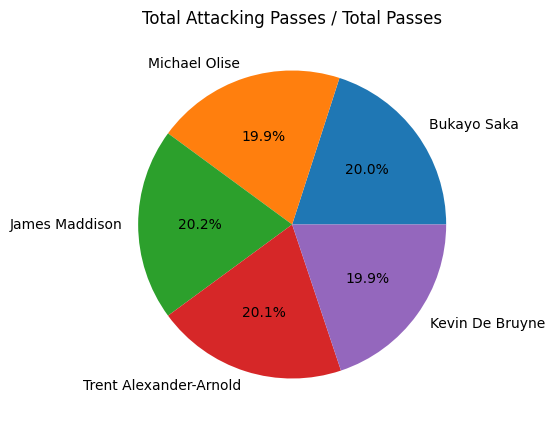

In [116]:
passes = ['TotalAtt_Pass', 'TotalComp_Passes', 'Live_Passes', 'Dead_Passes', 'Switches_Pass', 'Cross_Passes']
players = ['Kevin De Bruyne', 'Bukayo Saka', 'Michael Olise', 'Trent Alexander-Arnold', 'James Maddison']
p = df_poss[df_poss['Player'].isin(players)]

passes_percentage = (p['TotalAtt_Pass'] / p['Total_Passes']) * 100
df_poss.loc[p.index, 'Passes_Percentage'] = passes_percentage.values

plt.figure(figsize=(10, 5))
plt.pie(df_poss.loc[p.index, 'Passes_Percentage'], labels=p['Player'], autopct='%1.1f%%')
plt.title('Total Attacking Passes / Total Passes')
plt.show()


In [105]:
teams = ['Manchester City' , 'Arsenal' , 'Crystal Palace' ,  'Liverpool' , 'Leicester City']
df_shot = pd.read_csv('shooting_premier_league_stats.csv')
df_pass = pd.read_csv('passing_premierleague_stats.csv')
df_shot = df_shot[df_shot['Squad'].isin(teams)]
df_pass = df_pass[df_pass['Squad'].isin(teams)]

df_pass

,Unnamed: 0,Squad,Cmp,Att,Cmp%,Att.1,Cmp%.1,Cmp.1,Att.2,Cmp%.2,...,Cmp%.3,Ast,Cmp.3,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP
0,1,Arsenal,18281,21969,83.2,9478,90.1,7825,8821,88.7,...,57.1,64,8542,46.8,10.2,443,1637,459,62,2049
6,7,Crystal Palace,13395,17308,77.4,6901,87.0,5794,6772,85.6,...,47.6,29,6005,23.8,0.0,316,1013,239,51,1243
10,11,Leicester City,14887,18871,78.9,8221,88.1,6087,7165,85.0,...,48.1,36,7245,26.3,-2.5,319,1142,220,52,1304
11,12,Liverpool,20043,24361,82.3,10114,89.2,8561,9758,87.7,...,59.8,58,9023,52.3,1.3,458,1615,452,85,1992
12,13,Manchester City,23263,26642,87.3,11888,92.7,9848,10836,90.9,...,67.8,69,11020,57.6,11.5,464,1770,445,75,2073


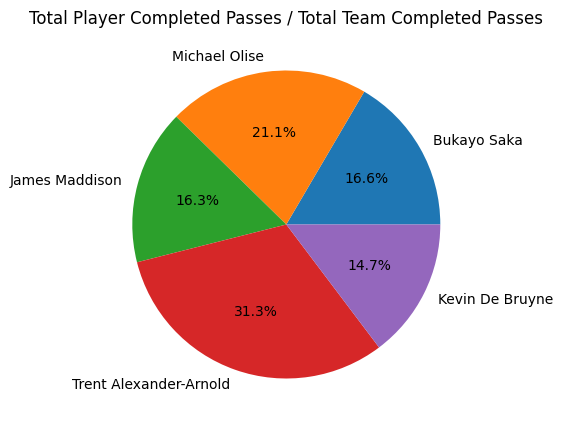

In [112]:
# total player completed passes / total team completed passes
players = ['Kevin De Bruyne' , 'Bukayo Saka' , 'Michael Olise' , 'Trent Alexander-Arnold' , 'James Maddison']
df_poss = df_poss[df_poss['Player'].isin(players)]
df_poss = df_poss.sort_values(by = 'Squad' , ascending = True)
team_cmp = df_pass['Cmp'].values
player_cmp = df_poss['TotalComp_Passes'].values
cmp_pct = (player_cmp / team_cmp) * 100

plt.figure(figsize = (10 , 5))
plt.pie(cmp_pct , labels = df_poss['Player'] , autopct='%1.1f%%')
plt.title('Total Player Completed Passes / Total Team Completed Passes')
plt.show()

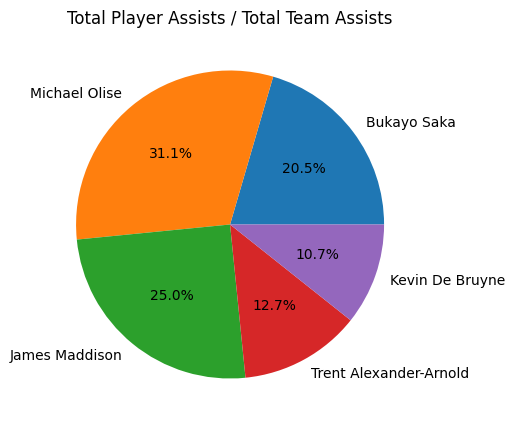

In [64]:
# total player assists / total team assists
players = ['Kevin De Bruyne' , 'Bukayo Saka' , 'Michael Olise' , 'Trent Alexander-Arnold' , 'James Maddison']
df_poss = df_poss[df_poss['Player'].isin(players)]
df_player = df_keypass[df_keypass['Player'].isin(players)]
df_poss = df_poss.sort_values(by = 'Squad' , ascending = True)
team_assists = df_pass['Ast'].values
player_assist = df_player['Assist'].values
assist = (player_assist / team_assists) * 100

plt.figure(figsize = (10 , 5))
plt.pie(assist , labels = df_poss['Player'] , autopct='%1.1f%%')
plt.title('Total Player Assists / Total Team Assists')
plt.show()

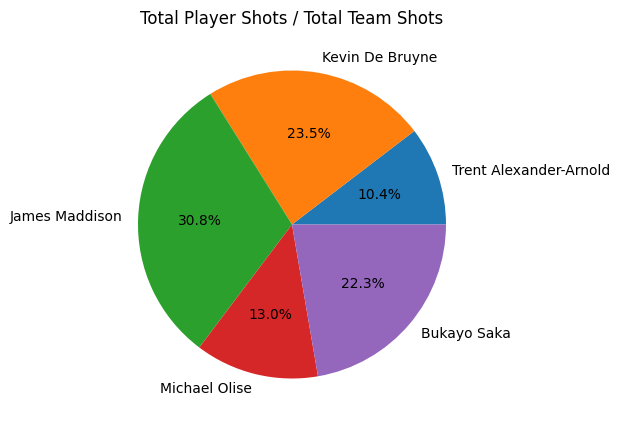

In [103]:
# total player shots / total team shots
df_player_shot = pd.read_csv('player_premier_league_shooting.csv')
player_shot = df_player_shot[df_player_shot['Player'].isin(players)]

total_player_shot = player_shot['Tot_Shot'].values
total_team_shot = df_shot['Sh'].values
shots = (total_player_shot / total_team_shot) * 100

plt.figure(figsize = (10 , 5))
plt.pie(shots , labels = player_shot['Player'] , autopct='%1.1f%%')
plt.title('Total Player Shots / Total Team Shots')
plt.show()

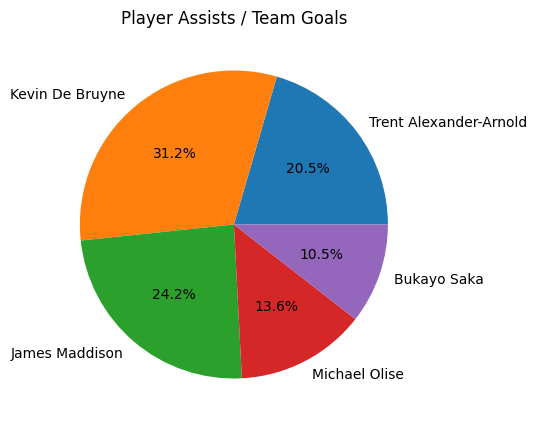

In [111]:
# player assists / total team goals
total_team_goals = df_shot['Gls'].values
goal_impact = (player_assist / total_team_goals) * 100
player = df_player_shot[df_player_shot['Player'].isin(players)]

plt.figure(figsize = (10 , 5))
plt.pie(goal_impact , labels = player['Player'] , autopct='%1.1f%%')
plt.title('Player Assists / Team Goals')
plt.show()